# Delivery Duration Prediction of DoorDash orders using Linear Regression

## Problem 
When a customer places an order on DoorDash, the company provides an estimated delivery time. This estimated delivery time is crucial for maintaining customer satisfaction, as accurate predictions help manage expectations and ensure a positive experience. However, predicting delivery times is challenging due to multiple variables involved in the delivery process.

## Objective 
The goal is to build a machine learning model that accurately predicts the total delivery duration (in seconds) for a given order. This involves predicting the time taken from when the customer submits the order (created_at) to when it's delivered to the customer (actual_delivery_time). The model will be trained on historical data, including features like market conditions, restaurant details, and order characteristics.

## Dataset Collection




## Import Packages

In [1684]:

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV


## Loading the Dataset

In [1650]:
df = pd.read_csv("historical_data.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [1651]:
df.shape

(197428, 16)

In [1652]:
df.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [1653]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [1654]:
df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


## Data Preprocessing and Feature Engineering

We seen that "created_at" and "actual_delivery_time" columns are in objects. We need to convert these to timestamps. 

In [1655]:
df["created_at"] = pd.to_datetime(df["created_at"], utc=True)
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"], utc=True)

In [1656]:
print(df["created_at"].dtypes)
print(df["actual_delivery_time"].dtypes)

datetime64[ns, UTC]
datetime64[ns, UTC]


Our target variable is the total delivery duration in seconds. This is the value that trying to predict using the other features in the dataset.

In [1657]:
df["total_delivery_duration"] = (df["actual_delivery_time"] -  df["created_at"]).dt.total_seconds()
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_delivery_duration
0,1.0,2015-02-06 22:24:17+00:00,2015-02-06 23:27:16+00:00,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25+00:00,2015-02-10 22:56:29+00:00,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28+00:00,2015-01-22 21:09:09+00:00,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45+00:00,2015-02-03 22:13:00+00:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36+00:00,2015-02-15 03:20:26+00:00,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


### Extract Date and Time features

In [1658]:
df["created_hour"] = df["created_at"].dt.hour
df["created_day"] = df["created_at"].dt.day
df["created_month"] = df["created_at"].dt.month
df["created_day_of_week"] = df["created_at"].dt.day_of_week
df["created_is_weekend"] = df["created_at"].dt.dayofweek >= 5

df['delivery_hour'] = df['actual_delivery_time'].dt.hour
df['delivery_day'] = df['actual_delivery_time'].dt.day
df['delivery_month'] = df['actual_delivery_time'].dt.month
df['delivery_day_of_week'] = df['actual_delivery_time'].dt.dayofweek
df['delivery_is_weekend'] = df['actual_delivery_time'].dt.dayofweek >= 5



Calculate Average Item Price

In [1659]:
df["avg_item_price"] = df["subtotal"] / df["total_items"]

Calculate Busy Dashers Ratio

In [1660]:
df['total_onshift_dashers'].replace(0, np.nan, inplace=True)


In [1661]:
df["busy_dashers_ratio"] = df["total_busy_dashers"] / df["total_onshift_dashers"]

Interaction features 

In [1662]:
df['total_items_x_busy_dashers_ratio'] = df['total_items'] * df['busy_dashers_ratio']
df['subtotal_x_busy_dashers_ratio'] = df['subtotal'] * df['busy_dashers_ratio']


### Missing values 

In [1663]:
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           19877
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
total_delivery_duration                             7
created_hour                                        0
created_day                 

We see that total delivery duration columns have missing values because we cannot calcuate the target variable. So we should remove it. 

In [1664]:
df.dropna(subset=["actual_delivery_time", "total_delivery_duration"], inplace=True)
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                0
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           19877
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
total_delivery_duration                             0
created_hour                                        0
created_day                 

In [1665]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

market_id                                        0.499947
created_at                                       0.000000
actual_delivery_time                             0.000000
store_id                                         0.000000
store_primary_category                           2.411091
order_protocol                                   0.503999
total_items                                      0.000000
subtotal                                         0.000000
num_distinct_items                               0.000000
min_item_price                                   0.000000
max_item_price                                   0.000000
total_onshift_dashers                           10.068331
total_busy_dashers                               8.237219
total_outstanding_orders                         8.237219
estimated_order_place_duration                   0.000000
estimated_store_to_consumer_driving_duration     0.266436
total_delivery_duration                          0.000000
created_hour  

Using impute since the percentage of missing value is relatively low, and removing rows would result in significant data loss. 

In [1666]:
median_imputer = SimpleImputer(strategy='median')
median_columns = ['total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 
                  'estimated_store_to_consumer_driving_duration']

df[median_columns] = median_imputer.fit_transform(df[median_columns])

mode_imputer = SimpleImputer(strategy='most_frequent')
mode_columns = ['market_id', 'order_protocol']

df[mode_columns] = mode_imputer.fit_transform(df[mode_columns])

df['store_primary_category'].fillna('Unknown', inplace=True)


print(df.isnull().sum())

market_id                                           0
created_at                                          0
actual_delivery_time                                0
store_id                                            0
store_primary_category                              0
order_protocol                                      0
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                               0
total_busy_dashers                                  0
total_outstanding_orders                            0
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration        0
total_delivery_duration                             0
created_hour                                        0
created_day                 

In [1667]:
df['busy_dashers_ratio'].fillna(df['busy_dashers_ratio'].median(), inplace=True)
df['total_items_x_busy_dashers_ratio'].fillna(df['total_items_x_busy_dashers_ratio'].median(), inplace=True)
df['subtotal_x_busy_dashers_ratio'].fillna(df['subtotal_x_busy_dashers_ratio'].median(), inplace=True)

print(df.isnull().sum())


market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
total_delivery_duration                         0
created_hour                                    0
created_day                                     0
created_month                                   0


### Handling Outliers

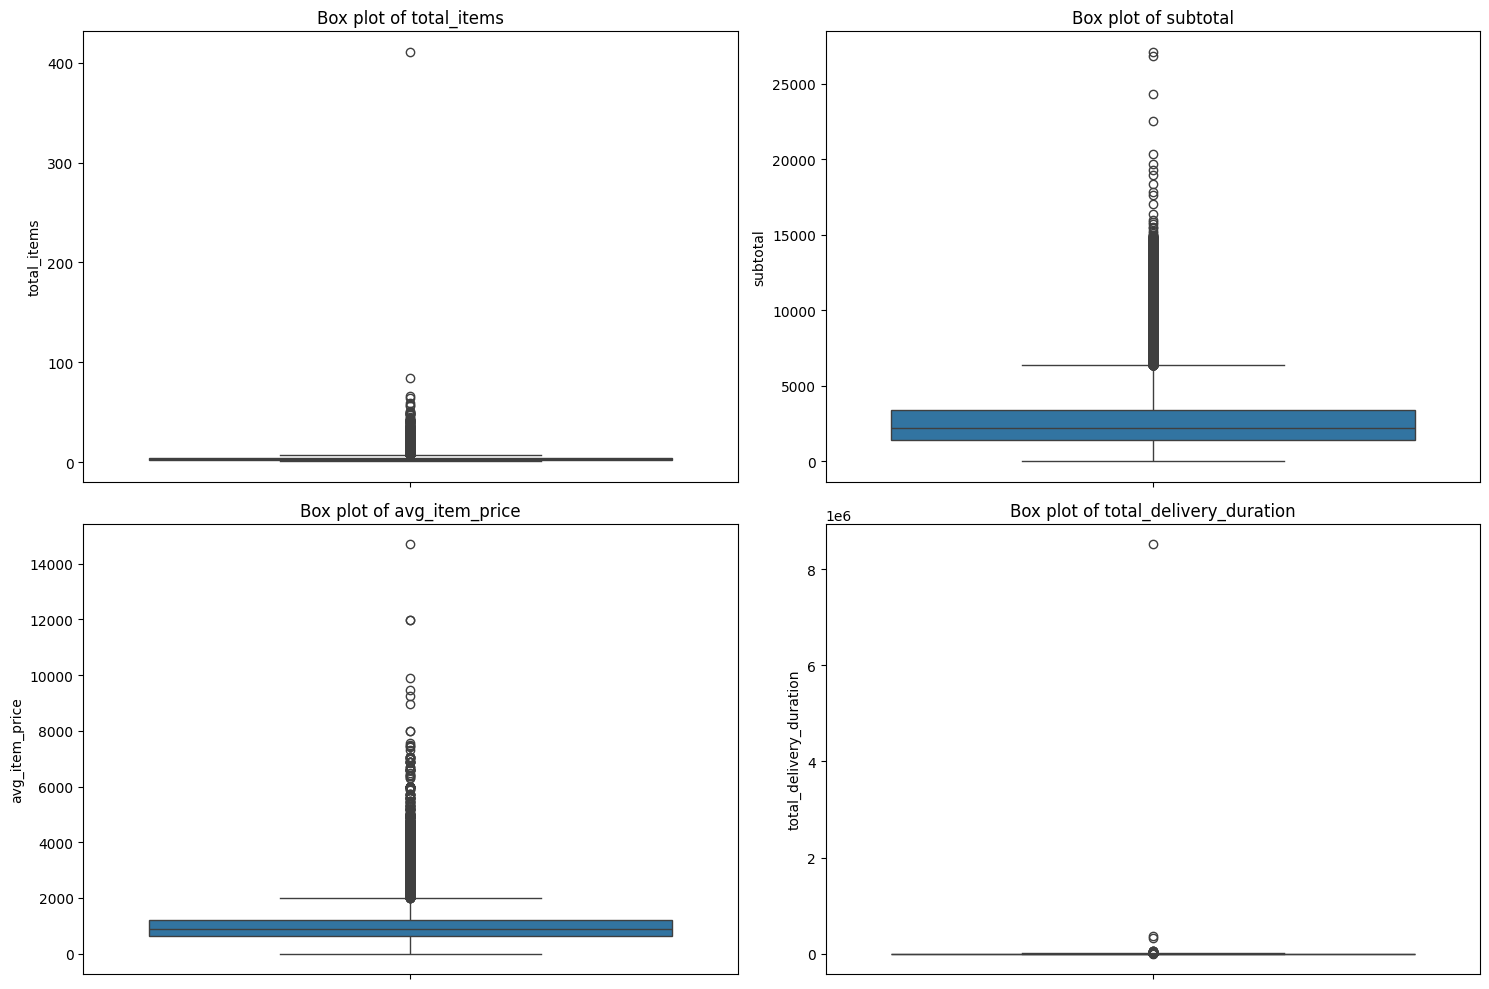

In [1668]:
numerical_features = ['total_items', 'subtotal', 'avg_item_price', 'total_delivery_duration']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

In [1669]:
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_total_items = identify_outliers_iqr(df, 'total_items')
outliers_subtotal = identify_outliers_iqr(df, 'subtotal')
outliers_avg_item_price = identify_outliers_iqr(df, 'avg_item_price')
outliers_total_delivery_duration = identify_outliers_iqr(df, 'total_delivery_duration')

print(f"Outliers in total_items: {len(outliers_total_items)}")
print(f"Outliers in subtotal: {len(outliers_subtotal)}")
print(f"Outliers in avg_item_price: {len(outliers_avg_item_price)}")
print(f"Outliers in total_delivery_duration: {len(outliers_total_delivery_duration)}")


Outliers in total_items: 9587
Outliers in subtotal: 9054
Outliers in avg_item_price: 6810
Outliers in total_delivery_duration: 6278


In [1670]:
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

cap_outliers(df, 'total_items')
cap_outliers(df, 'subtotal')
cap_outliers(df, 'avg_item_price')
cap_outliers(df, 'total_delivery_duration')


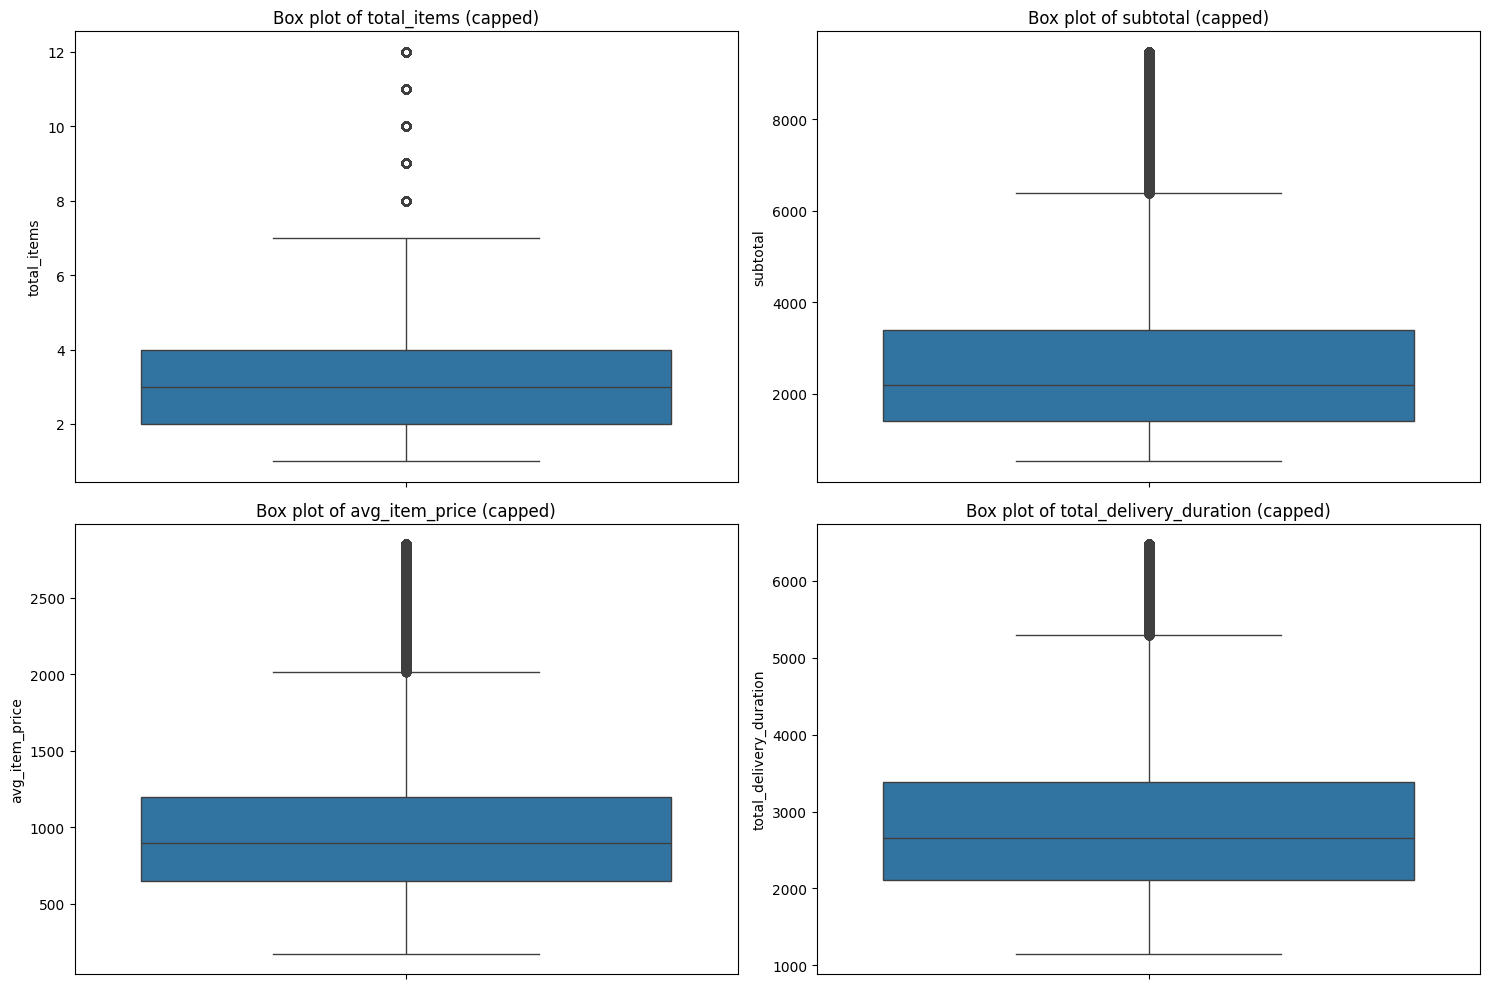

In [1671]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(df[feature])
    plt.title(f'Box plot of {feature} (capped)')
plt.tight_layout()
plt.show()


### Log transformation

Log transformation is oftn used in data preprocessing to address issues related to the distribution of data. 

1. Handling Skewness
- Many real-world datasets have features with skewed distributions. Skewed data can negatively impact the performance of machine learning models, especially linear models. 
- Log transformation can reduce skewness, making the distribution more symmetric and closer to a normal distribution. 

2. Reducing the impact of outliers
- Skewed data often has outliers that can disproportionately influence model training. 
- By applying log transoformation, the impact of large outliers is reduced, as the transformation compresses the range of values. 

3. Linear Relationships
- Many machine learning models (e.g., linear regression) assume a linear relationship between features and the target variable.
- Log transformation can help linearize relationships, making it easier for models to learn from the data.

4. Improving Model Performance
- Certain algorithms, like linear regression, benefit from features that are normally distributed or have reduced skewness.
- Log transformation can lead to improved model performance and more robust results.

Without Log transformation 

- We can see is very highly skewed, with a long tail on the right. 
- Difficult for models to learn from this distribution

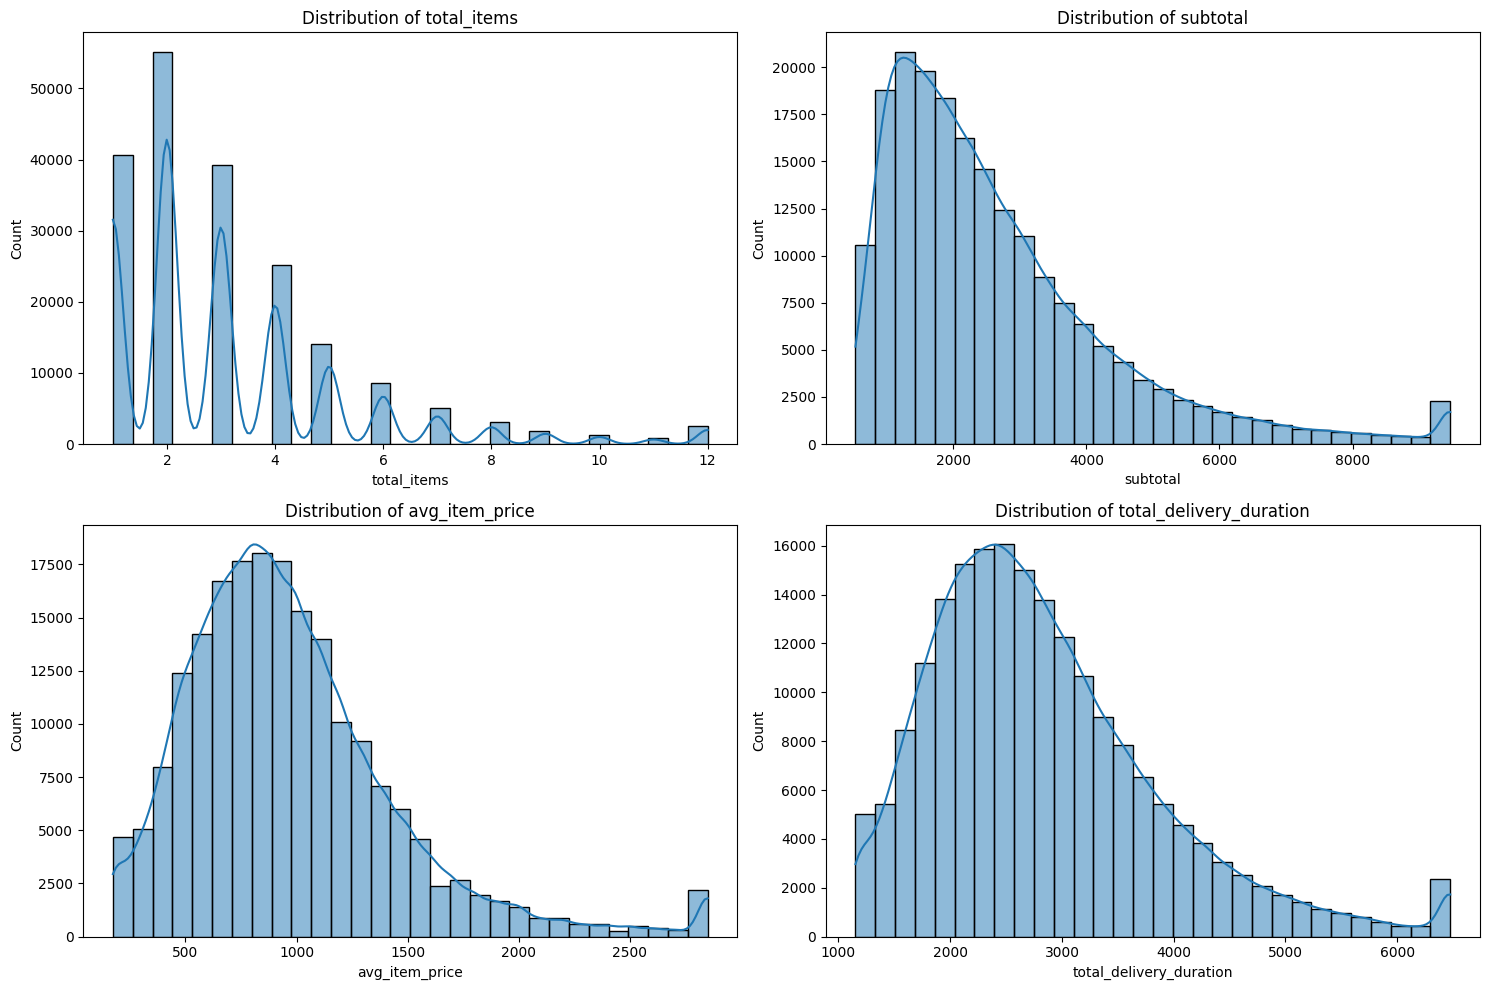

In [1672]:
features = ['total_items', 'subtotal', 'avg_item_price', 'total_delivery_duration']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

With log transformation

- More symmetric and closer to normal distribution 
- Easier for models to learn from this distribution

In [1673]:
df['log_total_items'] = np.log1p(df['total_items'])
df['log_subtotal'] = np.log1p(df['subtotal'])
df['log_avg_item_price'] = np.log1p(df['avg_item_price'])
df['log_total_delivery_duration'] = np.log1p(df['total_delivery_duration'])


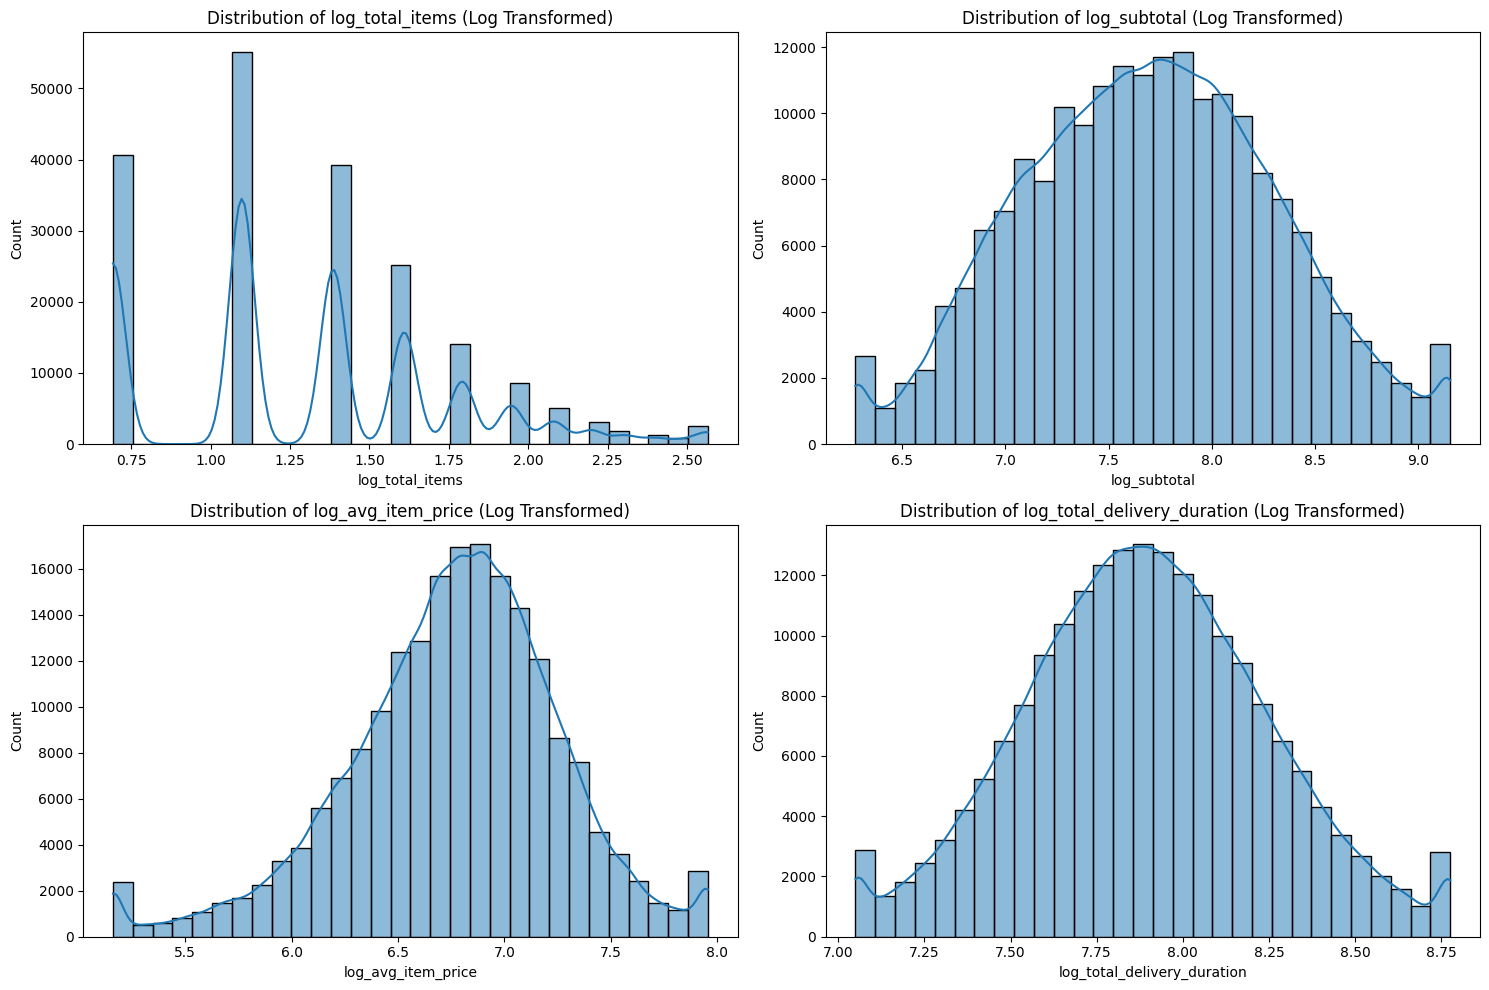

In [1674]:
plt.figure(figsize=(15, 10))
features = ['log_total_items', 'log_subtotal', 'log_avg_item_price', 'log_total_delivery_duration']
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature} (Log Transformed)')
plt.tight_layout()
plt.show()

### Encode Categorical Variables

In [1675]:
columns_to_drop = ['created_at', 'actual_delivery_time', 'total_delivery_duration', 
                   'total_items', 'subtotal', 'avg_item_price']

df.drop(columns=columns_to_drop, inplace=True)

df.head()

,market_id,store_id,store_primary_category,order_protocol,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,...,delivery_month,delivery_day_of_week,delivery_is_weekend,busy_dashers_ratio,total_items_x_busy_dashers_ratio,subtotal_x_busy_dashers_ratio,log_total_items,log_subtotal,log_avg_item_price,log_total_delivery_duration
0,1.0,1845,american,1.0,4,557,1239,33.0,14.0,21.0,...,2.0,4.0,False,0.424242,1.69697,1459.818182,1.609438,8.143808,6.758385,8.237479
1,2.0,5477,mexican,2.0,1,1400,1400,1.0,2.0,2.0,...,2.0,1.0,False,2.000000,2.00000,3800.000000,0.693147,7.550135,7.550135,8.300280
2,3.0,5477,Unknown,1.0,1,1900,1900,1.0,0.0,0.0,...,1.0,3.0,False,0.000000,0.00000,0.000000,0.693147,7.550135,7.550135,7.485492
3,3.0,5477,Unknown,1.0,5,600,1800,1.0,1.0,2.0,...,2.0,1.0,False,1.000000,6.00000,6900.000000,1.945910,8.839422,7.048386,8.031385
4,3.0,5477,Unknown,1.0,3,1100,1600,6.0,6.0,9.0,...,2.0,6.0,True,1.000000,3.00000,3900.000000,1.386294,8.268988,7.170888,7.779467


In [1676]:
df["store_primary_category"].replace("Unknown", "unkown", inplace=True)

df = pd.get_dummies(df, columns=["store_primary_category", "order_protocol", "market_id"], drop_first=True)

I need to change the data types due to boolean (True/False) instead of (0 and 1) from dummies variables. 

In [1677]:
boolean_columns = df.select_dtypes(include=['bool']).columns
df[boolean_columns] = df[boolean_columns].astype(int)

In [1678]:
df[boolean_columns].head()

,created_is_weekend,delivery_is_weekend,store_primary_category_african,store_primary_category_alcohol,store_primary_category_alcohol-plus-food,store_primary_category_american,store_primary_category_argentine,store_primary_category_asian,store_primary_category_barbecue,store_primary_category_belgian,...,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [1679]:
df.head()

,store_id,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,created_hour,...,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1845,4,557,1239,33.0,14.0,21.0,446,861.0,22,...,0,0,0,0,0,0,0,0,0,0
1,5477,1,1400,1400,1.0,2.0,2.0,446,690.0,21,...,0,0,0,0,0,1,0,0,0,0
2,5477,1,1900,1900,1.0,0.0,0.0,446,690.0,20,...,0,0,0,0,0,0,1,0,0,0
3,5477,5,600,1800,1.0,1.0,2.0,446,289.0,21,...,0,0,0,0,0,0,1,0,0,0
4,5477,3,1100,1600,6.0,6.0,9.0,446,650.0,2,...,0,0,0,0,0,0,1,0,0,0


## Split the Data into Training and Testing Sets

In [1680]:
X = df.drop(columns=['log_total_delivery_duration'])
y = df['log_total_delivery_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (157936, 110)
Test set shape: (39485, 110)


## Model Selection and Evaluation Model 

Modeling multiple algorithms allows us to compare their performance and select the best one for the specific problem. Each machine learning algorithm has its strengths and weaknesses, and their effectiveness can vary depending on the characteristics of the dataset.


In [1683]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor())
]

results = {}
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred)
    }

for name, metrics in results.items():
    print(f"{name} - RMSE: {metrics['RMSE']:.4f}, MAE: {metrics['MAE']:.4f}, R²: {metrics['R²']:.4f}")


Linear Regression - RMSE: 0.2970, MAE: 0.2349, R²: 0.2863
Decision Tree - RMSE: 0.3638, MAE: 0.2836, R²: -0.0709
Random Forest - RMSE: 0.2534, MAE: 0.1993, R²: 0.4802
Gradient Boosting - RMSE: 0.2673, MAE: 0.2115, R²: 0.4217
XGBoost - RMSE: 0.2360, MAE: 0.1867, R²: 0.5491


Analyzing all the evaluation metrics, we see that the best models is XGBoost. 
With RMSE the lowest of 0.2360, MAE the lowest of  0.1867, and R^2 the highest of 0.5491. 

Random Forest is the second-best model but has higher RMSE and MAE compared to XGBoost.

The Decision Tree has the worst performance, with negative R² indicating poor fit to the data.